# Investigating Racial Disparities of Traffic Stops in Illinois, US

On a typical day in the United States, more than 50,000 traffic stops are made by police. These data have been recorded over the past decade and analysed by the Standford Open Policing Project team on whether police treat minority groups unfairly. You can find their published paper [here](https://5harad.com/papers/traffic-stops.pdf) using the same data [here](https://openpolicing.stanford.edu/data/).

In this project, I will only work on the data from Illinois, which is the 6th most populous state of the United States. The reason being is that Illinois is one of the few states that contains data in every variable recorded by the Standford Open Policing Project team (the others are Connecticut, Rhode Island, Vermont and Washington) and provides a reasonable amount of data (~4.7 million rows) for a full comprehensive analysis. Click [here](https://github.com/5harad/openpolicing/blob/master/DATA-README.md) for an overview of the data used. 

## Table of Content

#### PART I :   Data Cleaning 

#### PART II:   Data Understanding 

#### PART III:  Exploratory Analysis

#### PART IV:  Key Summary



In [1]:
#Importing relevant packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame
import folium #please install this externally using (conda install -c conda-forge folium)
from folium.plugins import HeatMap
import branca #please install this externally using (conda install -c conda-forge branca)
import branca.colormap as cm

% matplotlib inline

In [2]:
#Loading Illinois Traffic Stop data
IL=pd.read_csv("IL.csv")
IL.tail()

/Users/Elliot/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,vehicle_type,drugs_related_stop,district
4715026,IL-2015-294393,IL,2015-12-31,23:50,ILLINOIS STATE POLICE 08,NaN,NaN,08,Illinois State Police,M,...,False,NaN,NaN,False,Written Warning,NaN,15.0,Jeep 2007,False,ILLINOIS STATE POLICE 08
4715027,IL-2015-294394,IL,2015-12-31,23:52,ILLINOIS STATE POLICE 03,Cook County,17031.0,03,Illinois State Police,M,...,False,NaN,NaN,False,Written Warning,NaN,10.0,Buic 2001,False,ILLINOIS STATE POLICE 03
4715028,IL-2015-294395,IL,2015-12-31,23:52,ILLINOIS STATE POLICE 01,NaN,NaN,01,Illinois State Police,F,...,False,NaN,NaN,False,Citation,NaN,15.0,Lexs 2001,False,ILLINOIS STATE POLICE 01
4715029,IL-2015-294396,IL,2015-12-31,23:55,ILLINOIS STATE POLICE 15,NaN,NaN,15,Illinois State Police,M,...,False,NaN,NaN,False,Written Warning,NaN,8.0,Lincoln 2008,False,ILLINOIS STATE POLICE 15
4715030,IL-2015-294397,IL,2015-12-31,23:57,ILLINOIS STATE POLICE 03,Cook County,17031.0,03,Illinois State Police,M,...,False,NaN,NaN,False,Citation,NaN,15.0,Hyun 2013,False,ILLINOIS STATE POLICE 03


## PART I : Data Cleaning

Here, I have decided to drop variable(s) that are either irrelevant to the analysis or have over 50% of its data missing. I will then remove the rows with missing data from the remaining variables, apart from `county_name` which is going to be filled in as the next step. 

In [3]:
IL.drop(["id","police_department","search_type_raw","search_type","stop_outcome","is_arrested","stop_duration","vehicle_type","drugs_related_stop"],axis=1,inplace=True)

In [4]:
IL.isnull().sum()

state                          0
stop_date                      0
stop_time                   2331
location_raw                 266
county_name              4240169
county_fips              4240169
fine_grained_location        266
driver_gender                  0
driver_age_raw                 0
driver_age                  2932
driver_race_raw                0
driver_race                    0
violation_raw                  0
violation                      0
search_conducted               0
contraband_found               0
district                     266
dtype: int64

In [5]:
IL1=IL.dropna(subset=["stop_time","location_raw","driver_age"])
IL2=IL1.reset_index(drop=True)
IL1.isnull().sum()

state                          0
stop_date                      0
stop_time                      0
location_raw                   0
county_name              4235583
county_fips              4235583
fine_grained_location          0
driver_gender                  0
driver_age_raw                 0
driver_age                     0
driver_race_raw                0
driver_race                    0
violation_raw                  0
violation                      0
search_conducted               0
contraband_found               0
district                       0
dtype: int64

In order to fill in the county names, I am making use of the column `fine_grained_location`, which in fact contains the district number of Illinois, to match with the corresponding district names that I have found in the Illinois district finder on the Internet (http://www.isp.state.il.us/districts/districtfinder.cfm). 

In this sense, the rest of the project will be based on districts rather than counties.

In [6]:
ILdistrict= pd.DataFrame.from_dict({
    0:"Unknown",
    "00":"Unknown",
    "Z2":"Unknown",
    1:"Sterling",
    "1":"Sterling",
    "01":"Sterling",
    2:"Elgin",
    "2":"Elgin",
    "02":"Elgin",
    3:"Cook County",
    "03":"Cook County",
    "3":"Cook County",
    4:"Cook County",
    "04":"Cook County",
    "4":"Cook County",
    5:"Lockport",
    "05":"Lockport",
    "5":"Lockport",
    6:"Potiac",
    "06":"Potiac",
    "6":"Potiac",
    7:"East Moline",
    "07":"East Moline",
    "7":"East Moline",
    8:"Metamora",
    "08":"Metamora",
    "8":"Metamora",
    9:"Springfield",
    "09":"Springfield",
    "9":"Springfield",
    10:"Pesotum",
    "10":"Pesotum",
    11:"Collinsville",
    "11":"Collinsville",
    12:"Effingham",
    "12":"Effingham",
    13:"DuQuoin",
    "13":"DuQuoin",
    14:"Macomb",
    "14":"Macomb",
    15:"Downers Grove",
    "15":"Downers Grove",
    16:"Pecatonica",
    "16":"Pecatonica",
    17:"La Salle",
    "17":"La Salle",
    18:"Litchfield",
    "18":"Litchfield",
    19:"Carmi",
    "19":"Carmi",
    20:"Pittsfield",
    "20":"Pittsfield",
    21:"Ashkum",
    "21":"Ashkum",
    22:"Ullin",
    "22":"Ullin"}, orient="index")

In [7]:
ILdistrict.reset_index(inplace=True)
ILdistrict1=ILdistrict.rename(columns={"index":"fine_grained_location"})
ILdistrict2=ILdistrict1.rename(columns={0:'district_name'})

IL2_fglonly=DataFrame(IL2["fine_grained_location"])
IL2_district_merged = pd.merge(IL2_fglonly, ILdistrict2, on="fine_grained_location", how="left")
IL2_district_merged.drop(["fine_grained_location"],axis=1,inplace=True)

IL3 = pd.concat([IL2, IL2_district_merged], axis=1)

Here, I further dropped `county_name`, `county_fips` and `location_raw` as they are either irrelevant or duplicated. 

I also rearranged the order of the variables (moved `district_name` next to `fine_grained_location` for ease of viewing.

In [8]:
IL3.drop(["county_name","county_fips","location_raw","district"],axis=1,inplace=True)
IL3 = IL3[["state","stop_date","stop_time","fine_grained_location","district_name","driver_gender","driver_age_raw","driver_age","driver_race_raw","driver_race","violation_raw","violation","search_conducted","contraband_found"]]
IL3.tail()

,state,stop_date,stop_time,fine_grained_location,district_name,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,contraband_found
4709499,IL,2015-12-31,23:50,08,Metamora,M,1997.0,18.0,Caucasian,White,"Moving Violation,Speed",Speeding,False,False
4709500,IL,2015-12-31,23:52,03,Cook County,M,1981.0,34.0,Black or African American,Black,"Equipment,Not applicable",Equipment,False,False
4709501,IL,2015-12-31,23:52,01,Sterling,F,1995.0,20.0,Black or African American,Black,"Equipment,Not applicable",Equipment,False,False
4709502,IL,2015-12-31,23:55,15,Downers Grove,M,1960.0,55.0,Caucasian,White,"Moving Violation,Speed",Speeding,False,False
4709503,IL,2015-12-31,23:57,03,Cook County,M,1986.0,29.0,Black or African American,Black,"Moving Violation,Lane Violation",Safe movement,False,False


In order to plot maps in the following section, it is necessary to add in the coordinates of different districts in Illinois, which are available here: https://www.gps-coordinates.org/. 

In [9]:
IL_coordinate = pd.DataFrame.from_dict({
    "Sterling":[41.78864199999999,-89.69621940000002],
    "Elgin":[42.0354084,-88.28256679999998],
    "Cook County":[41.7376587,-87.69755399999997],
    "Lockport":[41.5894752,-88.057837],
    "Potiac":[40.8808666,-88.6297839],
    "East Moline":[41.5008673,-90.44429789999998],
    "Metamora":[40.7905919,-89.36064329999999],
    "Springfield":[39.78172130000001,-89.65014810000002],
    "Pesotum":[39.9147532,-88.27338270000001],
    "Collinsville":[38.6703266,-89.98454759999998],
    "Effingham":[39.1200418,-88.54338289999998],
    "DuQuoin":[38.0114393,-89.23619350000001],
    "Macomb":[40.4592076,-90.67179709999999],
    "Downers Grove":[41.8089191,-88.0111746],
    "Pecatonica":[42.3139078,-89.35927879999997],
    "La Salle":[41.3621503,-89.0418249],
    "Litchfield":[39.1753256,-89.6542579],
    "Carmi":[38.0908796,-88.15864879999998],
    "Pittsfield":[39.6078254,-90.8051289],
    "Ashkum":[40.8803113,-87.9550405],
    "Ullin":[37.2769948,-89.18341129999999]}, orient="index")

In [10]:
IL_coordinate.reset_index(inplace=True)
IL_coordinate1=IL_coordinate.rename(columns={"index":"district_name"})
IL_coordinate2=IL_coordinate1.rename(columns={0:'latitude'})
IL_coordinate3=IL_coordinate2.rename(columns={1:'longitude'})

In [11]:
IL_district=DataFrame(IL3["district_name"])
IL_mergedcood=pd.merge(IL_district,IL_coordinate3, on="district_name", how="left")
IL_mergedcood.drop(["district_name"],axis=1,inplace=True)

IL4 = pd.concat([IL_mergedcood,IL3], axis=1)
IL4.tail()

,latitude,longitude,state,stop_date,stop_time,fine_grained_location,district_name,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,contraband_found
4709499,40.790592,-89.360643,IL,2015-12-31,23:50,08,Metamora,M,1997.0,18.0,Caucasian,White,"Moving Violation,Speed",Speeding,False,False
4709500,41.737659,-87.697554,IL,2015-12-31,23:52,03,Cook County,M,1981.0,34.0,Black or African American,Black,"Equipment,Not applicable",Equipment,False,False
4709501,41.788642,-89.696219,IL,2015-12-31,23:52,01,Sterling,F,1995.0,20.0,Black or African American,Black,"Equipment,Not applicable",Equipment,False,False
4709502,41.808919,-88.011175,IL,2015-12-31,23:55,15,Downers Grove,M,1960.0,55.0,Caucasian,White,"Moving Violation,Speed",Speeding,False,False
4709503,41.737659,-87.697554,IL,2015-12-31,23:57,03,Cook County,M,1986.0,29.0,Black or African American,Black,"Moving Violation,Lane Violation",Safe movement,False,False


## PART II : Data Understanding

It is necessary to understand the basic trends of the data by plotting simple graphs with variables such as drivers' gender, age, type of violation and of course race. 

/Users/Elliot/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


70.9334783451% of the drivers are male.
29.0665216549% of the drivers are female.


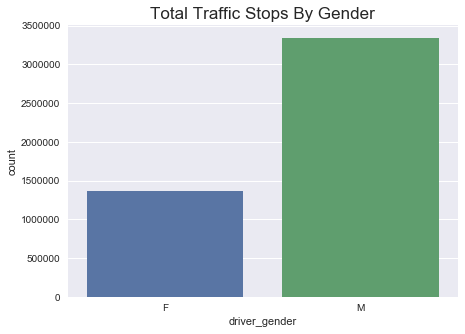

In [12]:
female = IL4[IL4["driver_gender"] == "F"].driver_gender.count()
male = IL4[IL4["driver_gender"] == "M"].driver_gender.count()
perc_male = (male*100)/(male+female) 
perc_female = (female*100)/(male+female)

plt.figure(figsize=(7,5))
sns.countplot(data=IL4, x="driver_gender")
sns.set(style='darkgrid')

plt.title("Total Traffic Stops By Gender", fontsize=17)

print (str(perc_male) + "% " + "of the drivers are male.")
print (str(perc_female) + "% " + "of the drivers are female.")

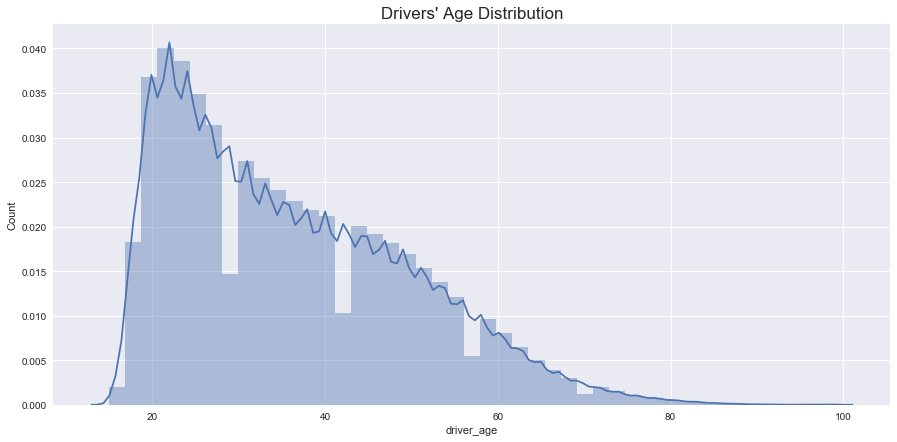

In [13]:
plt.figure(figsize=(15,7))
age_dist = sns.distplot(IL4["driver_age"], bins=45)

age_dist.set(xlabel="driver_age", ylabel="Count")

plt.title("Drivers' Age Distribution", fontsize=17)

The curve above is clearly left-skewed, implying that young adult drivers (aged 18-25) tend to be stopped by police in Illinois. 

The next thing that I want to look into is whether the curve will vary across different race. If the curve of a particular race varies by a large extent compared to the majority (for instance, all minority groups' curve are left-skewed while White's curve is somewhat symmetrical), it will indicate a tendency to stop young drivers from minority groups.

/Users/Elliot/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


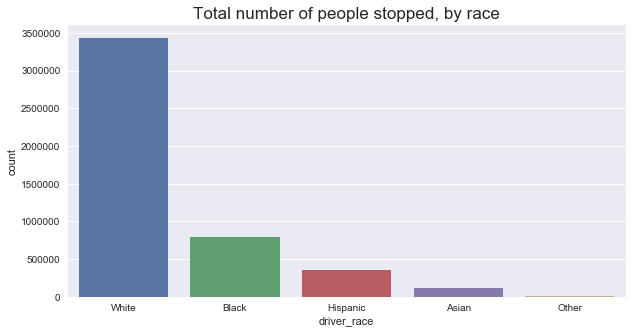

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=IL4, x="driver_race")

plt.title("Total number of people stopped, by race", fontsize=17)

The reason for White people being stopped the most is very likely to be due to its dense population. Simply by looking at the absolute count of traffic stops is insufficient in determining whether racial disparities exist in Illinois. 

Therefore, more insightful indicators such as `search rate` and `hit rate` will be introduced in Part III (Exploratory Analysis). 

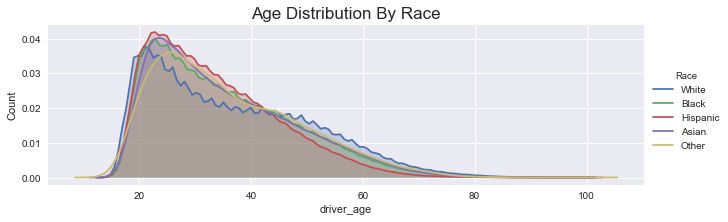

In [15]:
IL4.driver_race.value_counts()
five_races = IL4[(IL4["driver_race"] == "White") | (IL4["driver_race"] == "Black") | (IL4["driver_race"] == "Hispanic") | (IL4["driver_race"] == "Asian") | (IL4["driver_race"] == "Other")]

g = sns.FacetGrid(data=five_races, hue="driver_race", aspect=3, size=3)
g.map(sns.kdeplot, "driver_age", shade=True)
g.add_legend(title="Race")
g.set_ylabels("Count")

plt.title("Age Distribution By Race", fontsize=17)

To combat the unequal number of traffic stops across different race, the Kernel Density Estimation (KDE) is a suitable plot to use as it automatically normalises absolute count on the y-axis. 

Since all the curves above pretty much have the same shape and height, we can conclude that minimal racial disparities exist in terms of age. 

/Users/Elliot/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


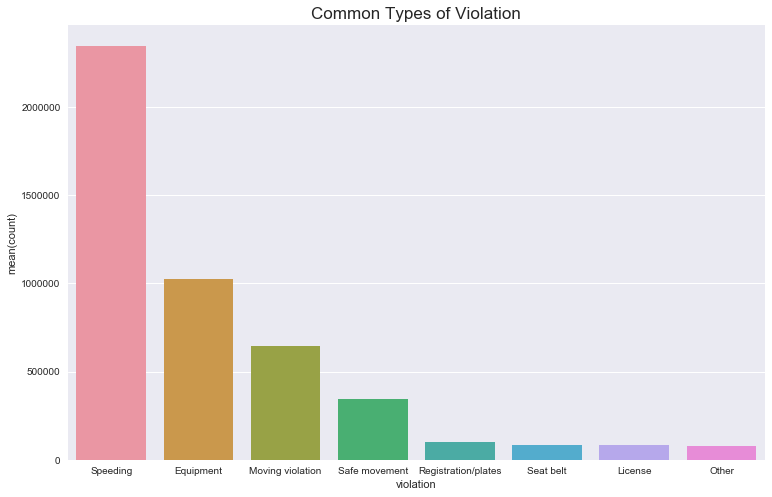

In [16]:
IL4_violation = IL4.filter(["violation"], axis=1)
IL4_violation["count"] = 1

grouped_violation = IL4_violation.groupby("violation", as_index=False,sort=False).sum()
grouped_violation.sort_index(ascending=False)
grouped_violation1 = grouped_violation.sort_values("count", ascending=False)

plt.figure(figsize=(12.5,8))
sns.barplot(data=grouped_violation1, x="violation", y="count")
plt.title("Common Types of Violation", fontsize=17)

`Speeding` and `Equipment` are the main source of violation, accounting for over 70% of all the violations recorded.  

It can be useful to look for trends in the data by generating graphs with respect to time. Let's create one which shows the total number of traffic stops in Illinois from 2004 to 2015. 

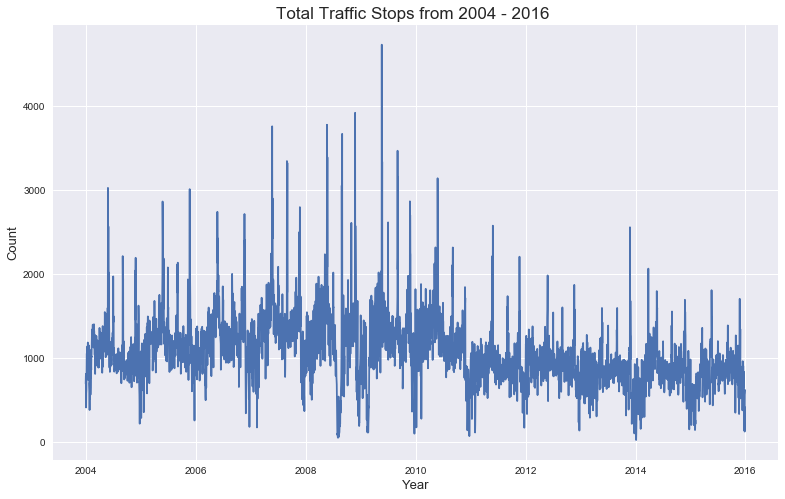

In [17]:
stops_overtime = IL4.groupby("stop_date").agg("count").iloc[:,0]
x = pd.date_range("2004-01-01",periods=len(stops_overtime))

plt.figure(figsize=(13,8))
plt.title("Total Traffic Stops from 2004 - 2016 ", fontsize=17)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.plot(x,stops_overtime)

It seems that the time graph exhibits some periodic fluctuations. This makes me believe that police may make more traffic stops on certains days of the week; for instance, traffic stops may be more frequently made on weekdays than over the weelend. 

Let's test my hypothesis by plotting a bar graph that shows the total number of traffic stops made on each day of the week. 

In [18]:
Week=pd.DataFrame(IL4.groupby("stop_date").agg("count").iloc[:,0])
IL4["stop_date"] = pd.to_datetime(IL4["stop_date"])
IL4["day_of_week"] = IL4["stop_date"].dt.weekday_name

IL4["day_of_week"].value_counts()

Friday       755359
Saturday     706292
Wednesday    681550
Thursday     654350
Sunday       639456
Monday       636356
Tuesday      636141
Name: day_of_week, dtype: int64

/Users/Elliot/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


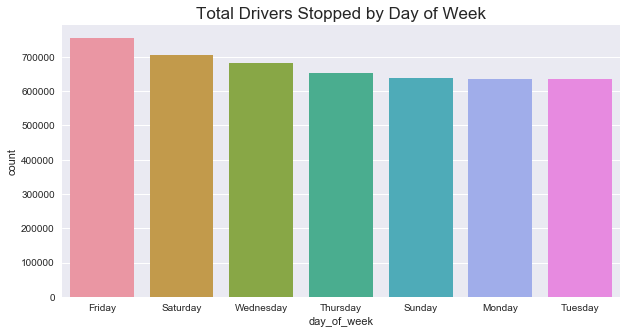

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=IL4, x="day_of_week",order=IL4["day_of_week"].value_counts().index)

plt.title("Total Drivers Stopped by Day of Week", fontsize=17)
plt.show()

The occurence of traffic stops is fairly consistent throughout the week, which goes against my hypothesis. 

#### Clustering
Before going into the exploratory analysis, it is necessary to have an understanding of how different districts of Illinois can be clustered based on similar charateristics. I have chosen to use the agglomerative clustering algorithm to conduct the clustering based on `Race`.

/Users/Elliot/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


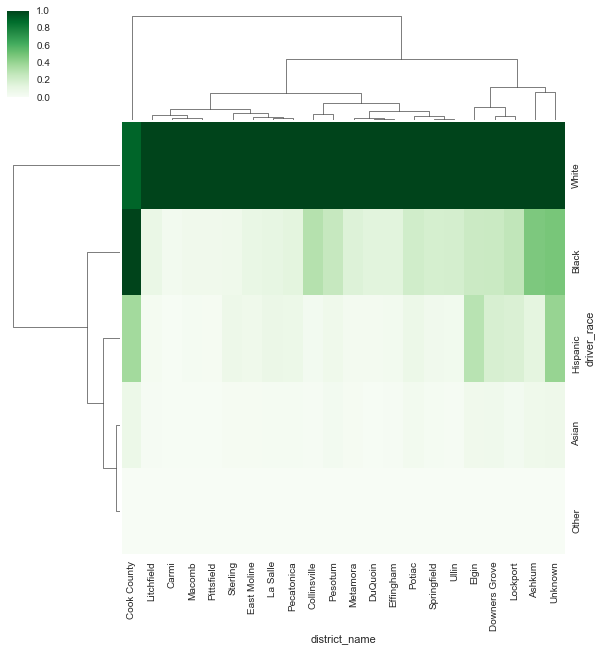

In [20]:
#Counting number of stops by race
race_heatmap=IL4.groupby('driver_race').district_name.value_counts(sort=True)
t=race_heatmap.unstack().fillna(0)

#Plotting the cluster heatmap
sns.clustermap(t, standard_scale=1, metric="euclidean", method="complete", cmap="Greens", robust=True)

The cluster heatmap has yielded a fairly obvious result - if you imagine cutting the dendrogram so that it can be divided into 3 clusters, you will realise that the rightmost cluster is constituted by `Elgin`, `Downers Grove`, `Ashkum`, `Lockport` and `Unknown`. Putting `Unknown` aside, all the other 4 districts are situated in Northern/North-eastern Illinois. The characteristic of this cluster is that while it has as many white drivers being stopped by police as other districts, there are more black and hispanic drivers being stopped in this cluster. 

It is also worth mentioning that `Cook County`, which is a county distinctively located in the Chicago metropolitan area in Northern Illinois, constitutes a cluster itself. There are less white drivers but a lot more black and hispanic drivers being stopped in `Cook County` compared to other clusters. 

Therefore, I reckon Illinois can be mainly separated into *two* or *three* parts in terms of traffic stops by drivers' race - `Central & Southern Illinois` and `Northern Illinois` (with the possibility of further separating `Cook County`).

## PART III: Exploratory Analysis

In order to determine whether racial disparities exist in traffic stops in Illinois, I will look into the `search rate` and the `hit rate` by race. `Search rate` refers to the proportion of *stopped* cars that have been searched, and `hit rate` refers to the proportion of *searched* cars that possess contraband. The initial hypothesis is that if racial disparities exist in Illinois, minorities should have a higher search rate and a lower hit rate than their White peers. 

However, it is important to be aware that this method is not a rigorous test of racial discrimination as different race groups may have different underlying likelihood of possessing contraband. For instance, if a certain race group in a certain district commits a disproportionate amount of contraband, it is reasonable for that race group to be stopped and searched at a higher rate. This problem is referred as the problem of infra-marginality [here](https://5harad.com/papers/threshold-test.pdf). 

Therefore, this project should not be seen as one that can draw definite conclusions on the existence of racial disparities in Illinois, but one that can demonstrate the current situation and provide a value of reference for future researchers.

In [21]:
#Creating search rate and hit rate by race
Data_race = IL4.groupby('driver_race').agg({'state':'count','search_conducted':'sum','contraband_found':'sum'})
Data_race.columns = ['stop_count','search_conducted','contraband_found']
Data_race['search_rate'] = (Data_race.loc[:,'search_conducted']/Data_race.loc[:,'stop_count'])*100
Data_race['hit_rate'] = (Data_race.loc[:,'contraband_found']/Data_race.loc[:,'search_conducted'])*100

Data_race.iloc[:,[0,3,4]]

,stop_count,search_rate,hit_rate
driver_race,,,
Asian,111631,2.292374,13.208284
Black,795005,8.139068,19.302692
Hispanic,359723,8.840691,12.483492
Other,9361,3.343660,14.376997
White,3433784,2.592854,24.518999


(<matplotlib.axes._subplots.AxesSubplot at 0x1121f4da0>,
 <matplotlib.text.Text at 0x1122b3f60>)

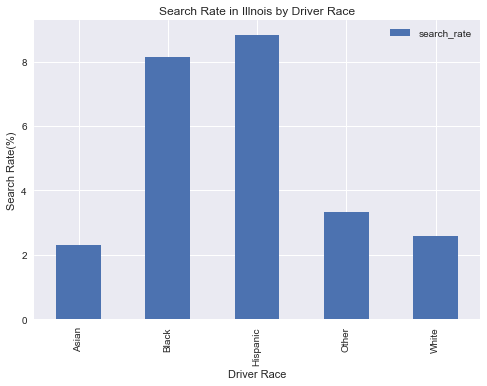

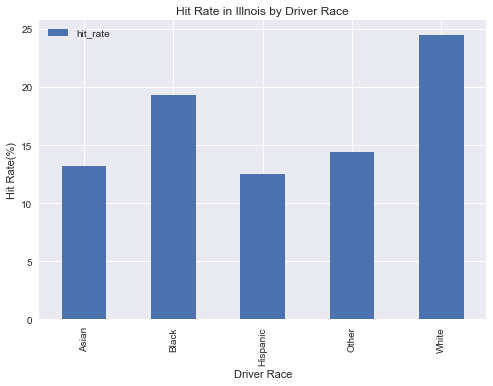

In [22]:
#Plotting the result above
Data_race.iloc[:,[3]].plot.bar(), plt.ylabel('Search Rate(%)'), plt.xlabel('Driver Race'), plt.title('Search Rate in Illnois by Driver Race')
Data_race.iloc[:,[4]].plot.bar(), plt.ylabel('Hit Rate(%)'), plt.xlabel('Driver Race'), plt.title('Hit Rate in Illnois by Driver Race')

Black and Hispanic drivers are much more likely to be searched than White drivers, yet their hit rates are surprisingly lower. It is worth drilling down into these two races. 

It is also worthwhile to obtain the `search rate` and `hit rate` by district too, as I presume they can vary by quite a lot across different districts. 

In [23]:
#Creating search rate and hit rate by race and district
Data_district = IL4.groupby(['district_name','driver_race']).agg({'state':'count','search_conducted':'sum','contraband_found':'sum'})
Data_district.columns = ['stop_count','search_conducted','contraband_found']
Data_district['search_rate'] = (Data_district.loc[:,'search_conducted']/Data_district.loc[:,'stop_count'])*100
Data_district['hit_rate'] = (Data_district.loc[:,'contraband_found']/Data_district.loc[:,'search_conducted'])*100

Data_district.iloc[:,[0,3,4]]

stop_count  search_rate    hit_rate
district_name driver_race                                     
Ashkum        Asian              5585     1.092211   13.114754
              Black             38833     4.985451   23.450413
              Hispanic          10866     4.767164   16.988417
              Other               535     1.308411   42.857143
              White             81369     1.348179   23.518687
Carmi         Asian              1103     1.359927   46.666667
              Black              6633     3.588120   31.512605
              Hispanic           1648     3.944175   21.538462
              Other               102     3.921569    0.000000
              White            168384     1.734132   41.506849
Collinsville  Asian              3760     2.606383   21.428571
              Black             67423     8.062531   30.555556
              Hispanic           7352    11.411861   19.427890
              Other               466     4.935622   30.434783
              White            216673     2.466851   25.706268
Cook County   Asian             16673     3.004858    9.181637
              Black            201365    10.770988   12.319609
              Hispanic          74812    11.486125    9.624113
              Other              1224     4.330065   16.981132
              White            180575     3.267894   13.184206
Downers Grove Asian             29121     1.864634    8.839779
              Black            117310     6.047225   16.845221
              Hispanic          91199     6.595467   14.264339
              Other              1890     2.857143    7.407407
              White            482621     1.854043   15.243630
DuQuoin       Asian              2610     1.724138   20.000000
              Black             29163     5.819017   22.804950
              Hispanic           6553     7.141767   11.324786
              Other               320     3.437500    9.090909
              White            207132     2.532202   26.768351
...                               ...          ...         ...
Pittsfield    Asian              1066     2.814259   16.666667
              Black              7217     9.893307   25.070028
              Hispanic           2312     9.126298   15.165877
              Other               120     8.333333   10.000000
              White            132227     3.651297   28.272577
Potiac        Asian              5578     1.577626   13.636364
              Black             29957     5.965217   22.943481
              Hispanic          11741     5.612810   15.174507
              Other               441     1.587302    0.000000
              White            138853     1.838635   23.893459
Springfield   Asian              4344     2.325046   19.801980
              Black             34357    10.082370   26.703233
              Hispanic           8823    13.793494    9.531635
              Other               511     3.326810   17.647059
              White            174556     3.575357   27.784009
Sterling      Asian              2711     1.069716   13.793103
              Black              8194     5.699292   17.130621
              Hispanic           9681     5.247392   17.125984
              Other               313     2.236422   14.285714
              White            126866     1.753031   25.584532
Ullin         Asian              1645     1.458967   45.833333
              Black             22439     4.741744   26.785714
              Hispanic           5229     6.597820   13.333333
              Other               196     1.530612    0.000000
              White            112890     2.297812   31.572860
Unknown       Asian                45     2.222222  100.000000
              Black               333     0.900901    0.000000
              Hispanic            275     0.363636    0.000000
              Other                 2     0.000000         NaN
              White               677     0.000000         NaN

[110 rows x 3 columns]

The next step would be to create a scatterplot which records both the `search rate` and `hit rate` of each race in every district. 

The aim is to identify the district(s) that possess relatively high `search rate` and low `hit rate` and conduct further analysis on these districts. To tackle this, I will plot a 45-degree line in each scatterpot. Since `search rate` is plotted against `hit rate`, if the coordinates of a district lie above the 45-degree line (or at least very close to the line), it means that its `search rate` is higher than its `hit rate` and racial disparity may potentially exist.

The district that possesses the abovementioned charateristics will be highglighted in different colours in the scatterplot.

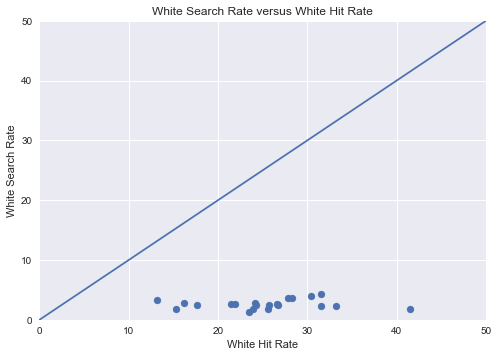

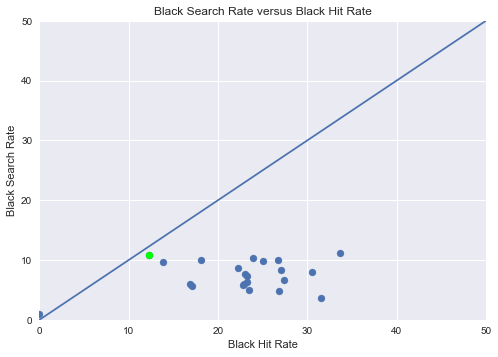

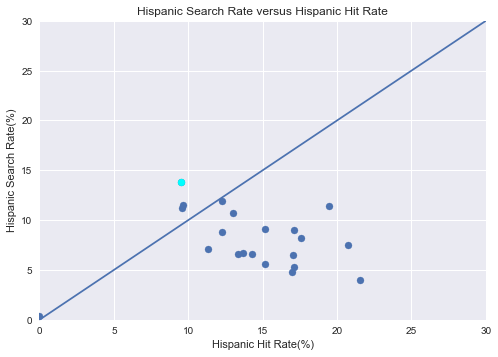

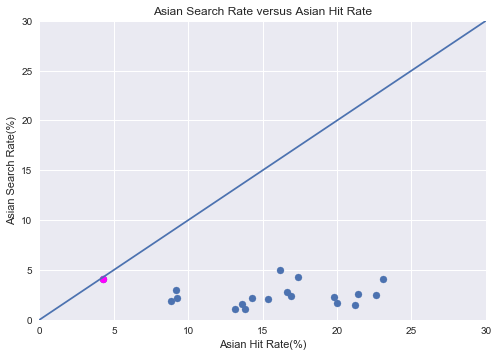

In [24]:
#Whites
plt.figure()
plt.scatter(Data_district.xs('White',level=1).loc[:,'hit_rate'],
            Data_district.xs('White',level=1).loc[:,'search_rate'])

plt.xlim(0,50),plt.ylim(0,50), plt.plot([0,50],[0,50]), plt.xlabel('White Hit Rate'), plt.ylabel('White Search Rate')
plt.title("White Search Rate versus White Hit Rate")

#Blacks
plt.figure()
plt.scatter(Data_district.xs('Black',level=1).loc[:,'hit_rate'],
            Data_district.xs('Black',level=1).loc[:,'search_rate'])

#Highlighting 'Cook County' on the scatterplot
plt.scatter(Data_district.loc[('Cook County','Black'),'hit_rate'],
            Data_district.loc[('Cook County','Black'),'search_rate'],color='lime')

plt.xlim(0,50),plt.ylim(0,50), plt.plot([0,50],[0,50]), plt.xlabel('Black Hit Rate'), plt.ylabel('Black Search Rate')
plt.title("Black Search Rate versus Black Hit Rate")


#Hispanics
plt.figure()
plt.scatter(Data_district.xs('Hispanic',level=1).loc[:,'hit_rate'],
            Data_district.xs('Hispanic',level=1).loc[:,'search_rate'])

plt.scatter(Data_district.loc[('Springfield','Hispanic'),'hit_rate'],
            Data_district.loc[('Springfield','Hispanic'),'search_rate'],color='aqua')

plt.xlim(0,30), plt.ylim(0,30), plt.plot([0,30],[0,30]), 
plt.xlabel('Hispanic Hit Rate(%)'),plt.ylabel('Hispanic Search Rate(%)'),plt.plot()
plt.title('Hispanic Search Rate versus Hispanic Hit Rate')

#Asians
plt.figure()
plt.scatter(Data_district.xs('Asian',level=1).loc[:,'hit_rate'],
            Data_district.xs('Asian',level=1).loc[:,'search_rate'])

plt.scatter(Data_district.loc[('Effingham','Asian'),'hit_rate'],
            Data_district.loc[('Effingham','Asian'),'search_rate'],color='magenta')

plt.ylim(0,30), plt.xlim(0,30),plt.plot([0,30],[0,30]), 
plt.xlabel('Asian Hit Rate(%)'),plt.ylabel('Asian Search Rate(%)'),plt.plot()
plt.title('Asian Search Rate versus Asian Hit Rate')

There are several findings from the 4 scatterplots above:

- Racial disparity does not seem to have existed on White drivers as most districts' hit rates are far higher than their corresponding search rates. 

- It is reasonable to believe that Hispanic drivers are *more* impacted by racial disparity than its Black and Asian peers, given that the majority of the districts (Hispanic) are comparatively closer to the line.  `Springfield` is found to be one of the two districts that are above the line.

- `Cook County` and `Effingham` are found to be the districts that are the closest to the line for Black drivers and Asian drivers respectively (even though both of them are still below the line). 

Due to the limited length of this project, only `Springfield` will be chosen to be drilled down. It is however suggested that `Cook County` and `Effingham` should also be looked into for future work if one wants to examine the effect of racial disparity on Black and Asian drivers in Illinois. 

Now, let's make use of `stop_date` to conduct some time series analysis on `Springfield`. Firstly, we can understand the driving-violation behaviours of Hispanic drivers in `Springfield` by plotting the count of various violation types on a monthly basis from 2004 - 2015. 

In [25]:
#Approximating days
date = pd.to_datetime(IL4['stop_date'])
time_delta=(date-date.min()).astype('timedelta64[D]')
IL4['days']=time_delta

#Approximate month (30 day window)
IL4['Month']=np.floor(IL4['days']/30)

In [26]:
#Selecting rows of hispanic drivers in Springfield only
IL4_springfield_ts = IL4.loc[(IL4['district_name'] == "Springfield") & (IL4['driver_race'] == "Hispanic")]
IL4_springfield_ts_vio = IL4_springfield_ts.groupby('Month').violation.value_counts(sort=True)
IL4_springfield_ts_vio = IL4_springfield_ts_vio.unstack().fillna(0)
                                     
IL4_springfield_ts_vio.head(15)

violation,Equipment,License,Moving violation,Other,Registration/plates,Safe movement,Seat belt,Speeding
Month,,,,,,,,
0.0,19.0,0.0,10.0,0.0,7.0,4.0,0.0,17.0
1.0,15.0,0.0,11.0,0.0,7.0,5.0,0.0,27.0
2.0,19.0,0.0,7.0,0.0,8.0,6.0,0.0,18.0
3.0,15.0,0.0,11.0,0.0,4.0,6.0,1.0,26.0
4.0,22.0,0.0,9.0,0.0,5.0,3.0,1.0,34.0
5.0,15.0,0.0,3.0,0.0,6.0,2.0,0.0,24.0
6.0,8.0,0.0,5.0,0.0,4.0,3.0,0.0,28.0
7.0,6.0,0.0,5.0,0.0,3.0,4.0,0.0,30.0
8.0,7.0,0.0,10.0,0.0,5.0,3.0,0.0,19.0


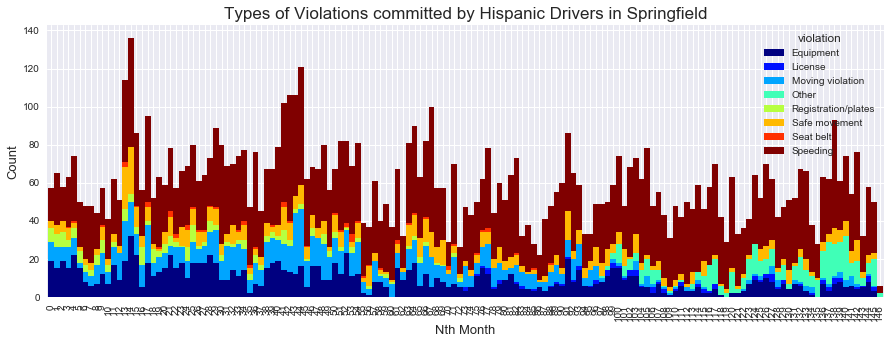

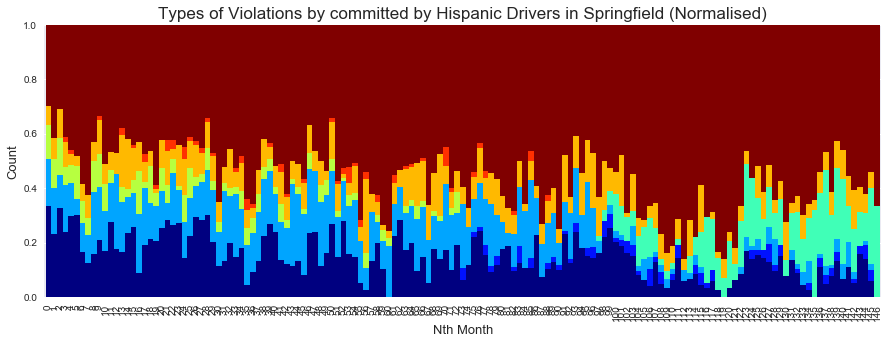

In [27]:
#Generating the time-series graph 
violation_timeseries = IL4_springfield_ts_vio[['Equipment','License','Moving violation','Other','Registration/plates','Safe movement','Seat belt','Speeding']]
violation_timeseries.index=[int(i) for i in violation_timeseries.index]
colors = plt.cm.jet(np.linspace(0, 1, violation_timeseries.shape[1]))
violation_timeseries.plot(kind='bar', stacked=True, figsize=(15,5), color=colors, width=1)

plt.xlabel('Nth Month', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title("Types of Violations committed by Hispanic Drivers in Springfield",fontsize=17)
                             
#Normalising the y-axis (count)
violation_timeseries1=violation_timeseries.div(violation_timeseries.sum(axis=1),axis=0)
violation_timeseries1.index=[int(i) for i in violation_timeseries1.index]
colors = plt.cm.GnBu(np.linspace(0, 1, violation_timeseries1.shape[1]))
colors = plt.cm.jet(np.linspace(0, 1, violation_timeseries1.shape[1]))
violation_timeseries1.plot(kind='bar', stacked=True, figsize=(15,5), color=colors, width=1,legend=False)

plt.ylim([0,1])
plt.xlabel('Nth Month', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title("Types of Violations by committed by Hispanic Drivers in Springfield (Normalised)",fontsize=17)

`Speeding` is the main source of violation and has experienced a gradual increase in numbers over years.
`Moving Violation` used to be the top three most frequently committed violation from 2004 - 2012, but people seem to have converted into committing `other` violations from 2012 onwards. 

Let's apply the same method on `false search` this time. `False search` refers to searches that fail to uncover any contraband. 

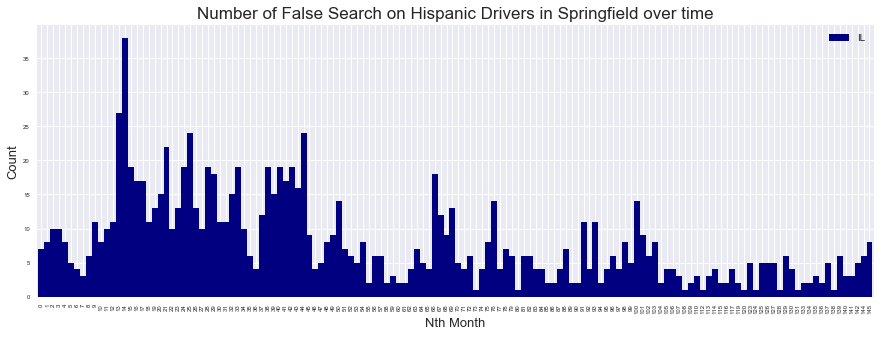

In [28]:
#Selecting rows involving "False Search" on Hispanic drivers in Springfield
IL4_FalseSearch = IL4.loc[(IL4['district_name'] == "Springfield") & (IL4['driver_race'] == "Hispanic") & (IL4['search_conducted'] == True) &  (IL4['contraband_found'] == False)]
IL4_FalseSearch1 = IL4_FalseSearch.groupby('Month').state.value_counts()
IL4_FalseSearch1 = IL4_FalseSearch1.unstack().fillna(0)

#Plotting the graph
IL4_FalseSearch1.index=[int(i) for i in IL4_FalseSearch1.index]
colors = plt.cm.jet(np.linspace(0, 1, IL4_FalseSearch1.shape[1]))
IL4_FalseSearch1.plot(kind='bar', stacked=True, subplots=True, figsize=(15,5), color=colors, width=1,fontsize=6)
plt.xlabel('Nth Month', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title("Number of False Search on Hispanic Drivers in Springfield over time",fontsize=17)

A better visualisation can be obtained in the form of a line graph as shown below.

/Users/Elliot/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


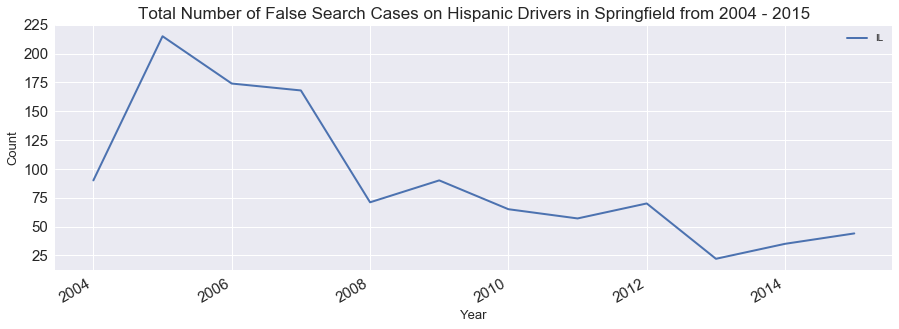

In [29]:
IL4_FalseSearch['Year'] = pd.to_datetime(IL4_FalseSearch.stop_date).dt.year

IL4_FalseSearch2 = IL4_FalseSearch.groupby('Year').state.value_counts()
IL4_FalseSearch2 = IL4_FalseSearch2.unstack().fillna(0)

IL4_FalseSearch2.plot(kind='line', stacked=True, subplots=True, figsize=(15,5), linewidth=2, fontsize=15)
plt.title("Total Number of False Search Cases on Hispanic Drivers in Springfield from 2004 - 2015",fontsize=17)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Count', fontsize=13)

Indeed, the number of `false search` cases has been dropping over years and reached its lowest point in 2013. It's interesting to know that the situation of false search on Hispanic drivers in Springfield is improving over time. 

To visualise the situation of `hit rate` against `search rate` in other districts of Illinois, I will first introduce the `Racial Disparity Index`, which is calculated by dividing `search rate` by `hit rate`. The closer the index is towards zero, the weaker the level of racial disparity in that district; whereas the larger the index, the stronger the level of racial disparity (note: since greater search rate and lower hit rate could indicate potential racial disparity problem). 

Two maps will then be plotted based on the Racial Disparity Index using the package `Folium` (one on Hispanic drivers and another one on Black drivers).

In [30]:
Hispanic_RDI = IL4.loc[(IL4['driver_race'] == "Hispanic")]
Hispanic_RDI1 = Hispanic_RDI.groupby(['latitude','longitude']).agg({'state':'count','search_conducted':'sum','contraband_found':'sum'})
Hispanic_RDI1.columns = ['stop_count','search_conducted','contraband_found']
Hispanic_RDI1['search_rate'] = (Hispanic_RDI1.loc[:,'search_conducted']/Hispanic_RDI1.loc[:,'stop_count'])*100
Hispanic_RDI1['hit_rate'] = (Hispanic_RDI1.loc[:,'contraband_found']/Hispanic_RDI1.loc[:,'search_conducted'])*100                
Hispanic_RDI1['Racial_Disparity_Index'] = Hispanic_RDI1['search_rate']/Hispanic_RDI1['hit_rate']
Hispanic_RDI2 = Hispanic_RDI1.reset_index()

Hispanic_RDI3 = Hispanic_RDI2.sort_values('Racial_Disparity_Index', ascending=False)
Hispanic_RDI3.iloc[:,[0,1,5,6,7]]

,latitude,longitude,search_rate,hit_rate,Racial_Disparity_Index
7,39.781721,-89.650148,13.793494,9.531635,1.447128
16,41.737659,-87.697554,11.486125,9.624113,1.193474
19,42.035408,-88.282567,11.253340,9.549965,1.178365
4,39.120042,-88.543383,11.901198,12.264151,0.970405
20,42.313908,-89.359279,10.680151,13.007284,0.821090
8,39.914753,-88.273383,8.811201,12.246964,0.719460
1,38.011439,-89.236194,7.141767,11.324786,0.630632
6,39.607825,-90.805129,9.126298,15.165877,0.601765
3,38.670327,-89.984548,11.411861,19.427890,0.587396
14,41.500867,-90.444298,9.003215,17.118227,0.525943


In [31]:
#Plotting the map on Hispanics
max_amount = float(Hispanic_RDI3['Racial_Disparity_Index'].max())
hmap = folium.Map(location=[39.7, -89.5], zoom_start=5)
hm_wide = HeatMap( list(zip(Hispanic_RDI3.latitude.values, Hispanic_RDI3.longitude.values, Hispanic_RDI3['Racial_Disparity_Index'].values)), 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

cm2 = branca.colormap.LinearColormap(['b','c','g','y','r'], vmin=0.183122, vmax=1.447128, caption="Racial Disparity Index (Hispanic)")
colors = np.sin(5 * np.linspace(0, 2*np.pi, 300))
hmap.add_child(cm2)
hmap.add_child(hm_wide)
folium.TileLayer('cartodbpositron').add_to(hmap) #to get names in english
hmap

In [32]:
Black_RDI = IL4.loc[(IL4['driver_race'] == "Black")]
Black_RDI1 = Black_RDI.groupby(['latitude','longitude']).agg({'state':'count','search_conducted':'sum','contraband_found':'sum'})
Black_RDI1.columns = ['stop_count','search_conducted','contraband_found']
Black_RDI1['search_rate'] = (Black_RDI1.loc[:,'search_conducted']/Black_RDI1.loc[:,'stop_count'])*100
Black_RDI1['hit_rate'] = (Black_RDI1.loc[:,'contraband_found']/Black_RDI1.loc[:,'search_conducted'])*100                
Black_RDI1['Racial_Disparity_Index'] = Black_RDI1['search_rate']/Black_RDI1['hit_rate']
Black_RDI2 = Black_RDI1.reset_index()

Black_RDI3 = Black_RDI2.sort_values('Racial_Disparity_Index', ascending=False)
Black_RDI3.iloc[:,[0,1,5,6,7]]

,latitude,longitude,search_rate,hit_rate,Racial_Disparity_Index
16,41.737659,-87.697554,10.770988,12.319609,0.874296
19,42.035408,-88.282567,9.630604,13.835652,0.696072
20,42.313908,-89.359279,9.948193,18.127884,0.548779
13,41.362150,-89.041825,10.309973,23.937908,0.430696
6,39.607825,-90.805129,9.893307,25.070028,0.394627
10,40.790592,-89.360643,8.605977,22.222222,0.387269
7,39.781721,-89.650148,10.082370,26.703233,0.377571
18,41.808919,-88.011175,6.047225,16.845221,0.358988
8,39.914753,-88.273383,7.668218,23.020979,0.333097
17,41.788642,-89.696219,5.699292,17.130621,0.332696


In [33]:
#Plotting the map on Blacks
max_amount = float(Black_RDI3['Racial_Disparity_Index'].max())
hmap = folium.Map(location=[39.7, -89.5], zoom_start=5)
hm_wide = HeatMap(list(zip(Black_RDI3.latitude.values, Black_RDI3.longitude.values, Black_RDI3['Racial_Disparity_Index'].values)), 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

cm2 = branca.colormap.LinearColormap(['b','c','g','y','r'], vmin=0.113863, vmax=0.874296, caption="Racial Disparity Index (Black)")
colors = np.sin(5 * np.linspace(0, 2*np.pi, 300))
hmap.add_child(cm2)
hmap.add_child(hm_wide)
folium.TileLayer('cartodbpositron').add_to(hmap) #to get names in english
hmap

In [34]:
Asian_RDI = IL4.loc[(IL4['driver_race'] == "Asian")]
Asian_RDI1 = Asian_RDI.groupby(['latitude','longitude']).agg({'state':'count','search_conducted':'sum','contraband_found':'sum'})
Asian_RDI1.columns = ['stop_count','search_conducted','contraband_found']
Asian_RDI1['search_rate'] = (Asian_RDI1.loc[:,'search_conducted']/Asian_RDI1.loc[:,'stop_count'])*100
Asian_RDI1['hit_rate'] = (Asian_RDI1.loc[:,'contraband_found']/Asian_RDI1.loc[:,'search_conducted'])*100                
Asian_RDI1['Racial_Disparity_Index'] = Asian_RDI1['search_rate']/Asian_RDI1['hit_rate']
Asian_RDI2 = Asian_RDI1.reset_index()

Asian_RDI3 = Asian_RDI2.sort_values('Racial_Disparity_Index', ascending=False)
Asian_RDI3.iloc[:,[0,1,5,6,7]]

,latitude,longitude,search_rate,hit_rate,Racial_Disparity_Index
4,39.120042,-88.543383,4.111601,4.285714,0.959373
16,41.737659,-87.697554,3.004858,9.181637,0.327268
14,41.500867,-90.444298,4.981685,16.176471,0.307959
13,41.362150,-89.041825,4.303909,17.346939,0.248108
19,42.035408,-88.282567,2.196162,9.223301,0.238110
18,41.808919,-88.011175,1.864634,8.839779,0.210937
9,40.459208,-90.671797,4.094488,23.076923,0.177428
6,39.607825,-90.805129,2.814259,16.666667,0.168856
20,42.313908,-89.359279,2.158828,14.285714,0.151118
8,39.914753,-88.273383,2.361200,16.891892,0.139783


In [35]:
#Plotting the map on Asians
max_amount = float(Asian_RDI2['Racial_Disparity_Index'].max())
hmap = folium.Map(location=[39.7, -89.5], zoom_start=5)
hm_wide = HeatMap(list(zip(Asian_RDI2.latitude.values, Asian_RDI2.longitude.values, Asian_RDI2['Racial_Disparity_Index'].values)), 
                  min_opacity=0.2, max_val=max_amount, radius=17, blur=15, max_zoom=1)

cm2 = branca.colormap.LinearColormap(['b','c','g','y','r'], vmin=0.029141, vmax=0.959373, caption="Racial Disparity Index (Asian)")
#colors = np.sin(5 * np.linspace(0, 2*np.pi, 300))
hmap.add_child(cm2)
hmap.add_child(hm_wide)
folium.TileLayer('cartodbpositron').add_to(hmap) #to get names in english
hmap

## Conclusion

I.     Teenage drivers are more likely to be stopped by police in Illinois, regardless of race

II.    Black and Hispanic drivers are much more likely to be searched than White drivers, yet their hit rates are surprisingly lower.

III.   Illinois can be mainly divided into three parts: *Northern Illinois*, *Central Illinois* and *Southern Illinois*. Racial Disparity on Black drivers seem to emerge in `Cook County` (Northern Illinois), whereas racial disparity on Hispanic drivers seem to appear predominantly in `Springfield` (Central Illinois), and also in `Elgin` and `Cook County` (both are in Northern Illinois). Asian drivers in `Effingham` (Southern Illinous) is also suspected to be unfairly treated (due to its relatively high Racial Disparity Index).

IV.    Amongst Hispanic drivers in Springfield, `Speeding` has been the main source of violation over years. People who used to commit `Moving Violation` seem to have turned into committing `other` violations from 2012 onwards

V.     The situation of `false search` on Hispanic drivers in Springfield has been improving over years 


## Next Steps

For future research, the Northern districts/counties of Illinois (i.e. Chicago/Cook County and Elgin) can be examined more conclusively as their Racial Disparity Index are fairly high on both Black and Hispanic drivers. Illinois's data can also be cross-examined with other states such as Washington or Texas for further analysis. 